<a href="https://colab.research.google.com/github/lucazappaterra/PhysLab-II---CYGNO/blob/main/PMT_Analysis_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and enviroment preparation

In [5]:
!pip install lecroyparser

In [6]:
import lecroyparser
import matplotlib.pyplot as plt
import os
import numpy as np

!wget -q https://media.giphy.com/media/yJFeycRK2DB4c/giphy.gif 
from IPython.display import Image

#!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/PMT_data_31-03/pmt-1648-dark.zip
#!unzip pmt-1648-dark.zip 

#!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/PMT_data_31-03/pmt-1648-spe.zip
#!unzip pmt-1648-spe.zip

In [7]:
# imo it could be smarter to import all data at once, it's just some Mb
!wget https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/Data.zip 
!unzip -q Data.zip # -q flag stands for 'quiet'

--2022-05-02 12:41:11--  https://github.com/lucazappaterra/PhysLab-II---CYGNO/raw/main/Data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/Data.zip [following]
--2022-05-02 12:41:11--  https://raw.githubusercontent.com/lucazappaterra/PhysLab-II---CYGNO/main/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13365337 (13M) [application/zip]
Saving to: ‘Data.zip.1’

Data.zip.1          100%[===================>]  12.75M  61.7MB/s    in 0.2s    

2022-05-02 12:41:11 (61.7 MB/s) - ‘Data.zip.1’ saved [13365337/13365337]

replace __MACOSX/._Data? [y]es

# 05/04 Data

In [4]:
# Pulser data paths
path_imp0='Data/20220405-PMT/pmt-1648/1648-imp0/'
files_imp0 = os.listdir(path_imp0)

path_imp2='Data/20220405-PMT/pmt-1648/1648-imp2/'
files_imp2 = os.listdir(path_imp2)

path_imp3='Data/20220405-PMT/pmt-1648/1648-imp3/'
files_imp3 = os.listdir(path_imp3)

path_imp4='Data/20220405-PMT/pmt-1648/1648-imp4/'
files_imp4 = os.listdir(path_imp4)

path_imp45='Data/20220405-PMT/pmt-1648/1648-imp4.5/'
files_imp45 = os.listdir(path_imp45)

path_imp5='Data/20220405-PMT/pmt-1648/1648-imp5/'
files_imp5 = os.listdir(path_imp5)

path_imp55='Data/20220405-PMT/pmt-1648/1648-imp5.5/'
files_imp55 = os.listdir(path_imp55)

path_imp6='Data/20220405-PMT/pmt-1648/1648-imp6/'
files_imp6 = os.listdir(path_imp6)

path_imp65='Data/20220405-PMT/pmt-1648/1648-imp6.5/'
files_imp65 = os.listdir(path_imp65)

No DS_Store!


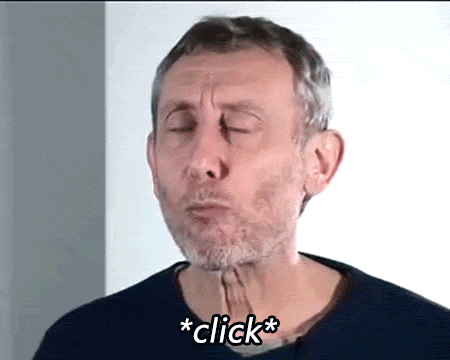

In [8]:
files = {0: files_imp0, 2: files_imp2, 3: files_imp3, 4: files_imp4, 45: files_imp45, 5: files_imp5, 55: files_imp55, 6: files_imp6, 65: files_imp65}
paths = {0: path_imp0, 2: path_imp2, 3: path_imp3, 4: path_imp4, 45: path_imp45, 5: path_imp5, 55: path_imp55, 6: path_imp6, 65: path_imp65}
flag = 0
for i in files:
    if (files=='.DS_Store'): flag+=1

if flag==0 :
    with open('giphy.gif','rb') as f:
        print('No DS_Store!')
        display(Image(data=f.read(), format='png'))
else: print(f"Oh no! i found {flag} DS_Store(s)")

### Intensity: 0

In [ ]:
usample=0
peaks = np.zeros(len(files_imp0))
peakpos = np.zeros(len(files_imp0))
t_imp0 = np.zeros(shape=(len(files_imp0), 502))
v_imp0 = np.zeros(shape=(len(files_imp0), 502))
for i,filename in enumerate(files_imp0):
    #print(i,filename)
    f = open(path_imp0+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp0[i] = data.x
    v_imp0[i] = data.y
  
    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

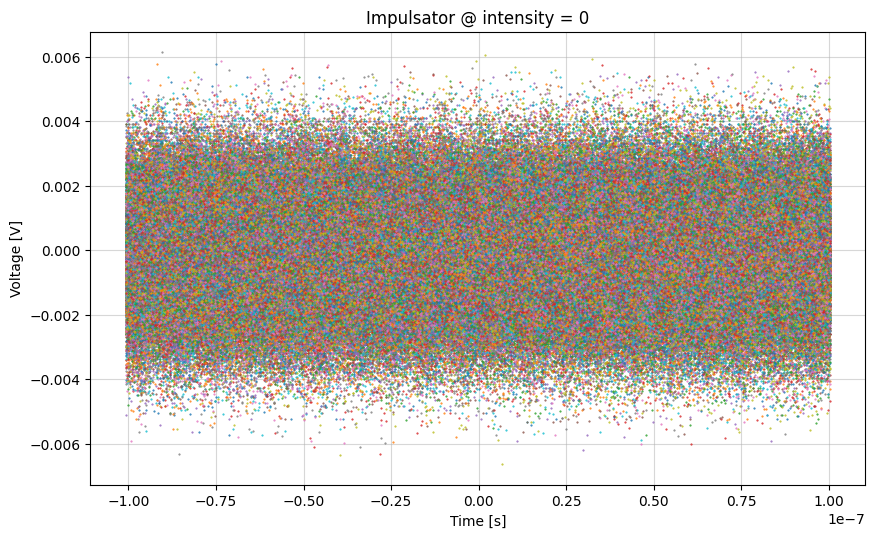

In [ ]:
mean = np.zeros(200)
plt.figure(figsize=(10,6), dpi=100)
plt.title('Impulsator @ intensity = 0')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files_imp0):
    plt.plot(t_imp0[k], v_imp0[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

### Intensity at request

which intensity would you like me to show? 
 Write a number: 
0


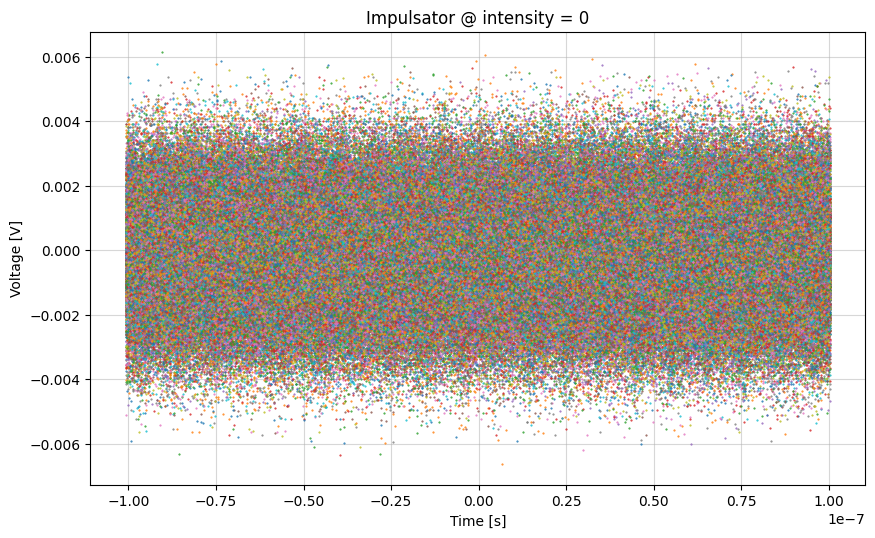

In [9]:
print('which intensity would you like me to show? \n Write a number: ')
a = int(input())
#files_imp = f'files_imp_{a}'
#path_imp = f'path_imp_{a}'
#print(files_imp, path_imp)
usample=0
#peaks = np.zeros(len(files[a]))
#peakpos = np.zeros(len(files[a]))
t_imp = np.zeros(shape=(len(files[a]), 502))
v_imp = np.zeros(shape=(len(files[a]), 502))
for i,filename in enumerate(files[a]):
    #print(i,filename)
    f = open(paths[a]+filename, 'rb')
    data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                  # we can't go further than the "WaveArrayCount"
    t_imp[i] = data.x
    v_imp[i] = data.y

    # let's find and print the number of peaks in the batch
    #peaks[i] = len(signal.find_peaks(-1*data.y, prominence=0.015)[0])
    #peakpos[i] = signal.find_peaks(-1*data.y, prominence=0.015)[0]
    #print(f"Peaks' index: {peakpos[i]}")
    #print(f'Peaks in this batch: {peaks[i]}\n')

plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Impulsator @ intensity = {a}')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

for k,filename in enumerate(files[a]):
    plt.plot(t_imp[k], v_imp[k], '.', linewidth=.5, markersize=1, label=filename)
    plt.grid(alpha=.5)

#plt.savefig(f'scatter_impulsator_{a}.png')

## Analisi del rumore

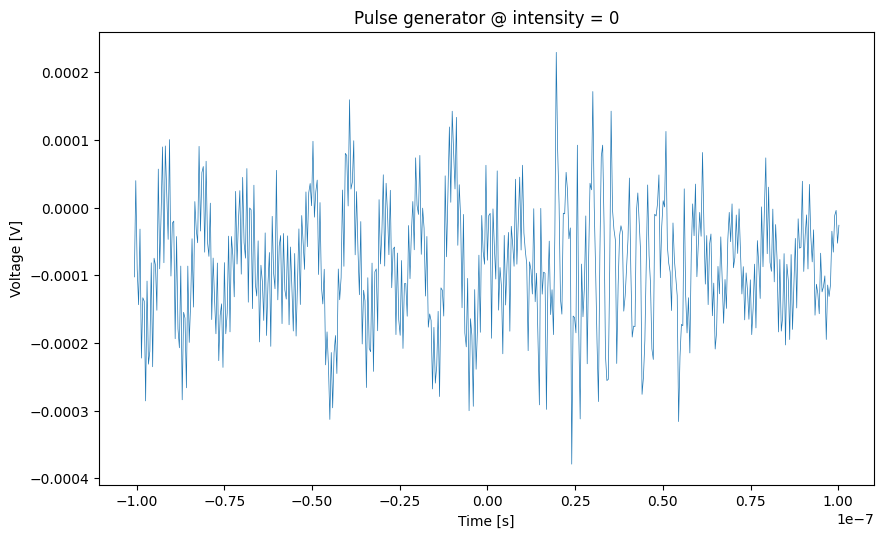

-8.539580757695428e-05 9.359850628539945e-05
-3.4294956780791597e-13 1.8234643916620054e-13


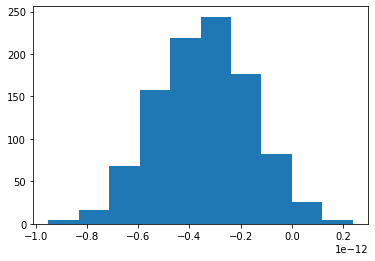

In [10]:
t=np.zeros(len(t_imp[0]))
v=np.zeros(len(t_imp[0]))
charge = np.zeros(len(t_imp[:,0]))
delta = (np.max(t_imp[0])-np.min(t_imp[0]))/len(t_imp[0])

for i in range(len(t_imp[:,0])):
  t+=t_imp[i]/len(t_imp[:,0])
  v+=v_imp[i]/len(t_imp[:,0])
  charge[i] = np.sum(v_imp[i])*delta/50.



plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Pulse generator @ intensity = {a}')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

plt.plot(t, v, '-', linewidth=.5, markersize=1, label=filename)
plt.show()
plt.hist(charge)

mean_noise= np.mean(v)
RMS_noise = np.std(v)

mean_charge = np.mean(charge)
RMS_charge = np.std(charge)

print(mean_noise, RMS_noise)
print(mean_charge, RMS_charge) #questo RMS è quello che useremo per il metodo P.I.N.C.I. (credo)

## Single photoelectron charge 

a 	 Mean noise 	 RMS_noise 	 Mean charge 	 RMS_charge 	 Real charge 	 RMS_rc 	 alpha 		 mean # of pe
3 	 1.96e-13 	 4.99e-14 	 1.70e-13 	 1.08e-13 	 -2.56e-14 	 9.52e-14 	 -3.54e-13 	 0.07
4 	 2.00e-13 	 5.50e-14 	 4.28e-14 	 2.35e-13 	 -1.57e-13 	 2.29e-13 	 -3.33e-13 	 0.47
45 	 1.86e-13 	 5.58e-14 	 -2.20e-13 	 3.89e-13 	 -4.06e-13 	 3.85e-13 	 -3.66e-13 	 1.11
5 	 1.77e-13 	 5.05e-14 	 -8.42e-13 	 5.87e-13 	 -1.02e-12 	 5.85e-13 	 -3.36e-13 	 3.03
55 	 1.80e-13 	 5.35e-14 	 -2.26e-12 	 9.95e-13 	 -2.44e-12 	 9.93e-13 	 -4.04e-13 	 6.04
6 	 1.86e-13 	 5.45e-14 	 -5.90e-12 	 1.56e-12 	 -6.09e-12 	 1.56e-12 	 -3.99e-13 	 15.27
65 	 1.93e-13 	 5.35e-14 	 -1.47e-11 	 2.31e-12 	 -1.49e-11 	 2.31e-12 	 -3.59e-13 	 41.41
mean alpha value: (-0.36 ± 0.03) pC


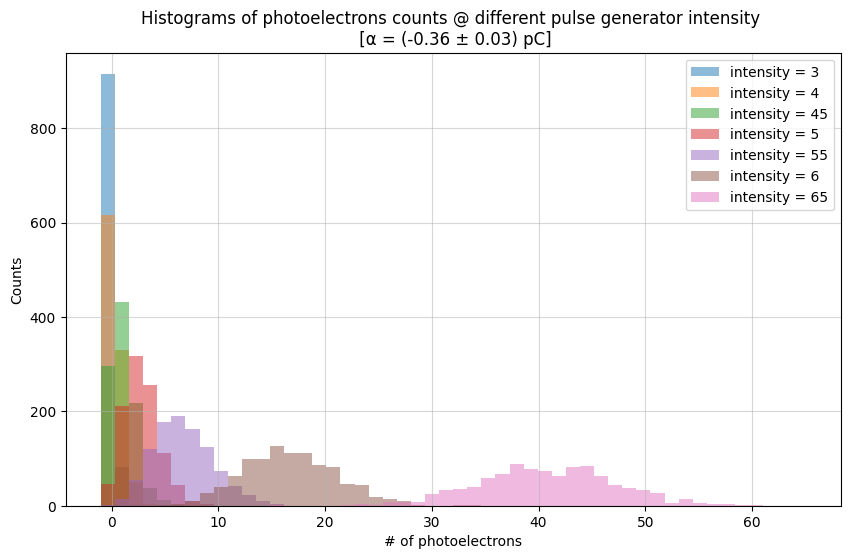

In [11]:
print(f'a \t Mean noise \t RMS_noise \t Mean charge \t RMS_charge \t Real charge \t RMS_rc \t alpha \t\t mean # of pe')
x = [3, 4, 45, 5, 55, 6, 65] #
alpha_mean = 0
alpha_for_std = []
charges = {}

plt.figure(figsize=(10,6), dpi=100)
plt.xlabel('# of photoelectrons')
plt.ylabel('Counts')
plt.grid(alpha=.5)

# loop over dataset
for a in x:

    # t and v reset to store the waveform mean value
    t = np.zeros(len(t_imp[0]))
    v = np.zeros(len(t_imp[0]))

    # loop over files 
    for i,filename in enumerate(files[a]):
        f = open(paths[a]+filename, 'rb')
        data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                      # we can't go further than the "WaveArrayCount"
        t_imp[i] = data.x
        v_imp[i] = data.y

    # charge noise and delta inizialization
    charge = np.zeros(len(files[a]))
    noise = np.zeros(len(files[a]))
    delta = (np.max(t_imp[0]) - np.min(t_imp[0]))/len(t_imp[0])

    # waveform's mean, integral (charge), and noise computation 
    for i in range(len(t_imp[:,0])):
        t += t_imp[i]/len(t_imp[:,0])
        v += v_imp[i]/len(t_imp[:,0])
        charge[i] = np.sum(v_imp[i,325:400])*delta/50.
        noise[i] = np.sum(v_imp[i,100:175])*delta/50.

    # computation of mean values (w/ relative RMS) and mean alpha to be printed
    mean_noise= np.mean(noise)
    RMS_noise = np.std(noise)

    mean_charge = np.mean(charge)
    RMS_charge = np.std(charge)
    
    real_charge = mean_charge-mean_noise
    real_charge_RMS_squared = RMS_charge*RMS_charge - RMS_noise*RMS_noise

    alpha = real_charge_RMS_squared/real_charge
    alpha_for_std.append(alpha)
    alpha_mean += alpha/len(x)
    

    # mean number of photoelectrons in the various samples
    mean_npe = real_charge/alpha

    # data plot w/ legend: histogram of cleaned (aka no noise) mean charge 
    # at different impulsator intensity, divided by the mean alpha (a posteriori), aka the spe charge
    charges[str(a)] = (-charge+mean_noise)/(3.645509080850178e-13)
    plt.hist(charges[str(a)], bins=50, label=f'intensity = {a}', alpha=.5, range=(-1,65), histtype='stepfilled', lw=2)
    plt.legend()

    # info print
    print(f'{a} \t {mean_noise:.2e} \t {RMS_noise:.2e} \t {mean_charge:.2e} \t {RMS_charge:.2e} \t {(real_charge):.2e} \t {np.sqrt(real_charge_RMS_squared):.2e} \t {alpha:.2e} \t {mean_npe:.2f}') 

alpha_std = np.std(alpha_for_std)
print(f'mean alpha value: ({(alpha_mean*1e12):.2f} ± {(alpha_std*1e12):.2f}) pC')
plt.title(f'Histograms of photoelectrons counts @ different pulse generator intensity \n [α = ({alpha_mean*1e12:.2f} ± {alpha_std*1e12:.2f}) pC]');

#save to file
plt.savefig(f'photoelectrons_distrib_hist_tot.png')

In [ ]:
print(f'{(3.645509080850178e-13/1.6e-19):.2e}')

2.28e+06


a 	 Mean noise 	 RMS_noise 	 Mean charge 	 RMS_charge 	 real charge 	 real RMS 	 alpha
3 	 1.96e-13 	 4.99e-14 	 1.70e-13 	 1.08e-13 	 -2.56e-14 	 9.52e-14 	 -3.54e-13
4 	 2.00e-13 	 5.50e-14 	 4.28e-14 	 2.35e-13 	 -1.57e-13 	 2.29e-13 	 -3.33e-13
45 	 1.86e-13 	 5.58e-14 	 -2.20e-13 	 3.89e-13 	 -4.06e-13 	 3.85e-13 	 -3.66e-13
5 	 1.77e-13 	 5.05e-14 	 -8.42e-13 	 5.87e-13 	 -1.02e-12 	 5.85e-13 	 -3.36e-13
55 	 1.80e-13 	 5.35e-14 	 -2.26e-12 	 9.95e-13 	 -2.44e-12 	 9.93e-13 	 -4.04e-13
6 	 1.86e-13 	 5.45e-14 	 -5.90e-12 	 1.56e-12 	 -6.09e-12 	 1.56e-12 	 -3.99e-13
65 	 1.93e-13 	 5.35e-14 	 -1.47e-11 	 2.31e-12 	 -1.49e-11 	 2.31e-12 	 -3.59e-13


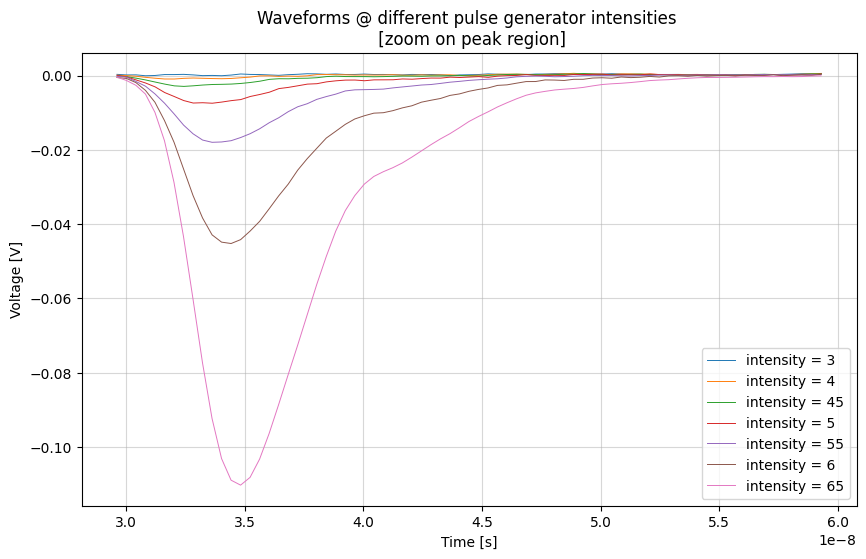

In [12]:
print(f'a \t Mean noise \t RMS_noise \t Mean charge \t RMS_charge \t real charge \t real RMS \t alpha')
x = [3, 4, 45, 5, 55, 6, 65]
alpha_c = 0

plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Waveforms @ different pulse generator intensities \n [zoom on peak region]')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.grid(alpha=.5)

# loop over dataset
for a in x:

    # t and v reset to store the waveform mean value
    t = np.zeros(len(t_imp[0]))
    v = np.zeros(len(t_imp[0]))

    # loop over files 
    for i,filename in enumerate(files[a]):
        f = open(paths[a]+filename, 'rb')
        data = lecroyparser.ScopeData(data = f.read(), sparse=usample) # sparse limits the number of samples in the output array, 
                                                                      # we can't go further than the "WaveArrayCount"
        t_imp[i] = data.x
        v_imp[i] = data.y
    
    # charge noise and delta inizialization
    charge = np.zeros(len(t_imp[:,0]))
    noise = np.zeros(len(t_imp[:,0]))
    delta = (np.max(t_imp[0])-np.min(t_imp[0]))/len(t_imp[0])

    # waveform's mean, integral (charge), and noise computation 
    for i in range(len(t_imp[:,0])):
        t+=t_imp[i]/len(t_imp[:,0])
        v+=v_imp[i]/len(t_imp[:,0])
        charge[i] = np.sum(v_imp[i,325:400])*delta/50.
        noise[i] = np.sum(v_imp[i,100:175])*delta/50.
    
    # computation of mean values (w/ relative RMS) and mean alpha to be printed
    mean_noise= np.mean(noise)
    RMS_noise = np.std(noise)

    mean_charge = np.mean(charge)
    RMS_charge = np.std(charge)
    
    real_charge = mean_charge-mean_noise
    real_RMS2 = RMS_charge*RMS_charge - RMS_noise*RMS_noise

    alpha = real_RMS2/real_charge
    alpha_c += alpha/len(x)

    # data plot w/ legend
    plt.plot(t[325:400], v[325:400], '-', linewidth=.7, markersize=1, label=f'intensity = {a}')
    plt.legend()

    # info print
    print(f'{a} \t {mean_noise:.2e} \t {RMS_noise:.2e} \t {mean_charge:.2e} \t {RMS_charge:.2e} \t {(real_charge):.2e} \t {np.sqrt(real_RMS2):.2e} \t {alpha:.2e}') 

#save to file
plt.savefig(f'waveform_zoom.png')

## Fitting the charge distribution

First we import what we need

In [13]:
from scipy import optimize as opt
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import nbinom

Then we define some functions to fit the data

In [89]:
def normal(y, A, mu, sigma):
    return A*np.exp(-(y - mu)**2 / (2 * sigma**2))
param_labels_normal=['A', 'mu', 'sigma']

def normal_conv(y, mu0, mu1, mu2, Amp0, Amp1, Amp2, sigma0, sigma1, sigma2): 
    conv = normal(y, Amp0, mu0, sigma0) + normal(y, Amp1, mu1, sigma1) + normal(y, Amp2, mu2, sigma2)
    return conv
param_labels_normal_conv = ['mu0', 'mu1', 'mu2', 'Amp0', 'Amp1', 'Amp2', 'sigma0', 'sigma1', 'sigma2']

def poissonian(k, lam): 
    return (lam**k / factorial(k)* np.exp(-lam))
param_labels_pois = ['λ', 'Amplitude']


We now fit the histogram given by the data obtained by setting the pulse generator intensity to 4 with `normal_conv()` and perform some data analysis to extract numerical probabilities, to be compared with the poissonian ones. \\
This will justify the assumption of a poissonian distribution for the photoelectrons seen by the PMT


# of events inside gaussian 0: 60.16843287821738
# of events inside gaussian 1: 36.28002126985343
# of events inside gaussian 2: 5.485346291124355


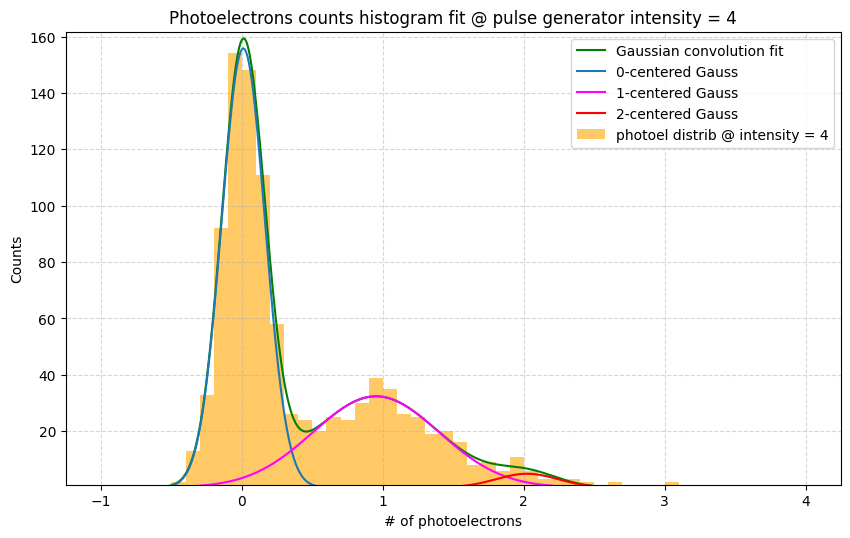

In [93]:
from math import pi
a = '4' # change this to see other plots

plt.figure(figsize=(10,6), dpi=100)
plt.title(f'Photoelectrons counts histogram fit @ pulse generator intensity = {a}')
plt.xlabel('# of photoelectrons')
plt.ylabel('Counts')
plt.grid(ls='--', alpha=.5)

# histogram plot and computation of bins centers
bin_heights, bin_borders, _ = plt.hist(charges[a], alpha=.6, bins=50, histtype='stepfilled', lw=2, label=f'photoel distrib @ intensity = {a}', color='orange',range=(-1,4))
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2

# fitting the gaussian convolution
pars_norm, pars_norm_cov = opt.curve_fit(normal_conv, bin_centers, bin_heights, p0=(0, 1, 2, 75, 30, 10, 0.5, 0.5, 0.5)) 

# saving fit results in a dictionary
fit_pars = {}
for i, par in enumerate(pars_norm):
    fit_pars[param_labels_normal_conv[i]] = par
    fit_pars[f'unc_{param_labels_normal_conv[i]}'] = np.sqrt(pars_norm_cov[i,i])

# counting events inside the three gaussian using the integration formula σ*A*√2π with uncertainties
event_numb = {'0' : np.sqrt(2*pi)*fit_pars['sigma0']*fit_pars['Amp0'],
              '1' : np.sqrt(2*pi)*fit_pars['sigma1']*fit_pars['Amp1'],
              '2' : np.sqrt(2*pi)*fit_pars['sigma1']*fit_pars['Amp2']
              }
tot_event_numb = 0
for key in event_numb.keys(): tot_event_numb+=event_numb[key]

unc_event_numb = {}
unc_event_numb['0']= np.sqrt( (fit_pars['unc_sigma0']/fit_pars['sigma0'])**2 + (fit_pars['unc_Amp0']/fit_pars['Amp0'])**2 )*event_numb['0']
unc_event_numb['1']= np.sqrt( (fit_pars['unc_sigma1']/fit_pars['sigma1'])**2 + (fit_pars['unc_Amp1']/fit_pars['Amp1'])**2 )*event_numb['1']
unc_event_numb['2']= np.sqrt( (fit_pars['unc_sigma2']/fit_pars['sigma2'])**2 + (fit_pars['unc_Amp2']/fit_pars['Amp2'])**2 )*event_numb['2']

tot_unc_event_numb = np.sqrt(unc_event_numb['0']**2 + unc_event_numb['1']**2 + unc_event_numb['2']**2)

# printing infos
for key in event_numb.keys(): print(f'# of events inside gaussian {key}: {event_numb[str(key)]}')

# computing relative probabilities using the number of events with uncertainties
probs = {}
probs['p0'] = event_numb['0']/(tot_event_numb)
probs['p1'] = event_numb['1']/(tot_event_numb)
probs['p2'] = event_numb['2']/(tot_event_numb)

mu0 = -np.log(probs['p0']) # expectation value given that the distribution is poissonian

unc_probs = {}
unc_probs['p0'] = np.sqrt( (unc_event_numb['0']/(tot_event_numb))**2 + (tot_unc_event_numb/(tot_event_numb)**2)**2 )
unc_probs['p1'] = np.sqrt( (unc_event_numb['1']/(tot_event_numb))**2 + (tot_unc_event_numb/(tot_event_numb)**2)**2 )
unc_probs['p2'] = np.sqrt( (unc_event_numb['2']/(tot_event_numb))**2 + (tot_unc_event_numb/(tot_event_numb)**2)**2 )

tot_prob = 0
for key in probs.keys(): tot_prob+=probs[key] # total "counted" probability

unc_mu0 = np.sqrt( (unc_event_numb['0']/event_numb['0'])**2 + (tot_unc_event_numb/(event_numb['0']+event_numb['1']+event_numb['2']))**2 )

# computing poissonian probabilities using the number of events with uncertainties
poisprobs = {} 
poisprobs['p0'] = poissonian(0,mu0)
poisprobs['p1'] = poissonian(1,mu0)
poisprobs['p2'] = poissonian(2,mu0)

tot_poisprob = 0
for key in poisprobs.keys(): tot_poisprob+=poisprobs[key] # total poissonian probability

unc_poisprobs = {}
unc_poisprobs['p0'] = np.exp(-mu0)*unc_mu0
unc_poisprobs['p1'] = abs((np.exp(-mu0) - mu0*np.exp(-mu0))*unc_mu0)
unc_poisprobs['p2'] = abs(( mu0*np.exp(-mu0) - mu0**2/2 * np.exp(-mu0) )*unc_mu0)
tot_unc_poisprobs = np.sqrt(unc_poisprobs['p0']**2 + unc_poisprobs['p1']**2 + unc_poisprobs['p2']**2)

# plot of the fitted distributions over the first histogram
x=np.arange(bin_borders[0],bin_borders[-1], 0.01)
y=np.linspace(0,bin_borders[-1])
#plt.yscale('log')
plt.ylim(bottom=1)
plt.plot(x, normal_conv(x, *pars_norm),label=f'Gaussian convolution fit', color='green')

plt.plot(x, normal(x, A=fit_pars['Amp0'], mu=fit_pars['mu0'], sigma=fit_pars['sigma0']), label='0-centered Gauss')
plt.plot(x, normal(x, A=fit_pars['Amp1'], mu=fit_pars['mu1'], sigma=fit_pars['sigma1']), label='1-centered Gauss', c='magenta')
plt.plot(x, normal(x, A=fit_pars['Amp2'], mu=fit_pars['mu2'], sigma=fit_pars['sigma2']), label='2-centered Gauss', c='red')
plt.legend();

#plt.savefig(f'hist_fit_4_log.png')

In [91]:
print(f'\t\t counting probs \t poissonian probs') 
print('\t\t--------------------------------------')
for i in range(3):
    p = f'p{i}'
    print(f'\t\t {probs[p]*1e2:.2f} ± {unc_probs[p]*1e2:.2f} \t\t {poisprobs[p]*1e2:.2f} ± {unc_poisprobs[p]*1e2:.2f}') 
print('\t\t--------------------------------------')
print(f'tot probs: \t {tot_prob*1e2:.2f} \t\t {tot_poisprob*1e2:.2f}')

		 counting probs 	 poissonian probs
		--------------------------------------
		 59.03 ± 1.39 		 59.03 ± 3.26
		 35.59 ± 3.38 		 31.12 ± 1.54
		 5.38 ± 3.39 		 8.20 ± 1.26
		--------------------------------------
tot probs: 	 100.00 		 98.35


In [88]:
import pandas as pd
df = pd.DataFrame([probs, unc_probs, poisprobs, unc_poisprobs]).transpose()
df*1e2


,0,1,2,3
p0,59.026969,1.393822,59.026969,3.256982
p1,35.591748,3.381928,31.117586,1.539980
p2,5.381283,3.391748,8.202218,1.264421
